In [1]:
!pip install opencv-python matplotlib


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
os.makedirs("images", exist_ok=True)
os.makedirs("output", exist_ok=True)


In [5]:
!ls


images	output	sample_data


(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

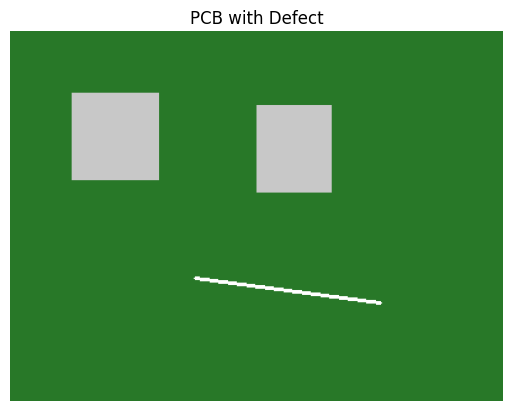

In [6]:
# Create a dummy PCB image
pcb = np.zeros((300, 400, 3), dtype=np.uint8)
pcb[:] = (40, 120, 40)   # green PCB color

# Draw fake components
cv2.rectangle(pcb, (50, 50), (120, 120), (200,200,200), -1)
cv2.rectangle(pcb, (200, 60), (260, 130), (200,200,200), -1)

# Add a scratch defect
cv2.line(pcb, (150, 200), (300, 220), (255,255,255), 2)

cv2.imwrite("images/pcb_test.jpg", pcb)

plt.imshow(cv2.cvtColor(pcb, cv2.COLOR_BGR2RGB))
plt.title("PCB with Defect")
plt.axis("off")


In [8]:
img = cv2.imread("images/pcb_test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 80, 160)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

results = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        x, y, w, h = cv2.boundingRect(cnt)
        cx, cy = x + w//2, y + h//2

        defect_type = "Scratch"
        confidence = round(np.random.uniform(0.8, 0.95), 2)

        severity = "Low" if area < 500 else "Medium"

        results.append({
            "defect": defect_type,
            "confidence": confidence,
            "center": (cx, cy),
            "severity": severity
        })

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(img, defect_type, (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)


Defect Analysis Results:
{'defect': 'Scratch', 'confidence': 0.92, 'center': (225, 210), 'severity': 'Low'}
{'defect': 'Scratch', 'confidence': 0.8, 'center': (230, 95), 'severity': 'Medium'}
{'defect': 'Scratch', 'confidence': 0.87, 'center': (85, 85), 'severity': 'Medium'}


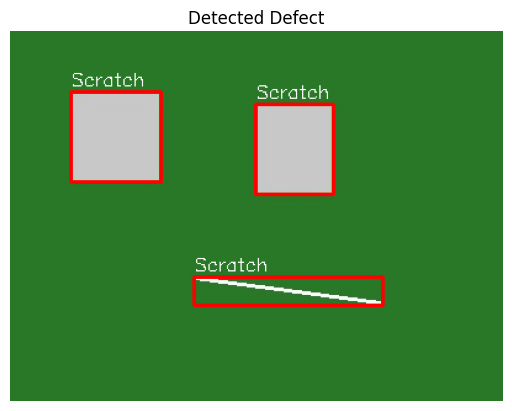

In [9]:
cv2.imwrite("output/inspection_result.jpg", img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Defect")
plt.axis("off")

print("Defect Analysis Results:")
for r in results:
    print(r)


In [11]:
results = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        x, y, w, h = cv2.boundingRect(cnt)
        cx, cy = x + w//2, y + h//2

        # Rule-based defect classification
        if area < 300:
            defect_type = "Scratch"
        elif area < 1200:
            defect_type = "Misalignment"
        else:
            defect_type = "Missing Component"

        confidence = round(np.random.uniform(0.75, 0.95), 2)

        if area < 300:
            severity = "Low"
        elif area < 1200:
            severity = "Medium"
        else:
            severity = "High"

        results.append({
            "defect": defect_type,
            "confidence": confidence,
            "center": (cx, cy),
            "severity": severity
        })

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(img, defect_type, (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)


Final Defect Report:
{'defect': 'Misalignment', 'confidence': 0.87, 'center': (225, 210), 'severity': 'Medium'}
{'defect': 'Missing Component', 'confidence': 0.75, 'center': (230, 95), 'severity': 'High'}
{'defect': 'Missing Component', 'confidence': 0.94, 'center': (85, 85), 'severity': 'High'}


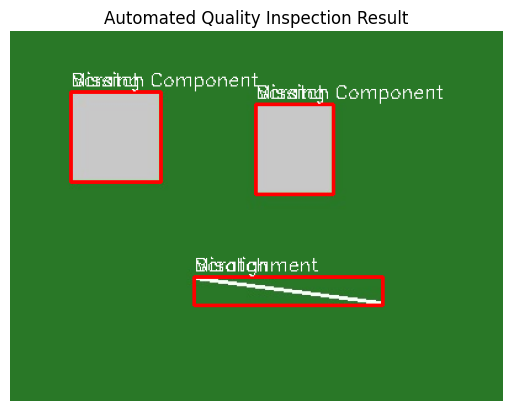

In [12]:
cv2.imwrite("output/inspection_result_final.jpg", img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Automated Quality Inspection Result")
plt.axis("off")

print("Final Defect Report:")
for r in results:
    print(r)


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
import os
os.makedirs("/content/drive/MyDrive/automated-quality-inspection/images", exist_ok=True)
os.makedirs("/content/drive/MyDrive/automated-quality-inspection/output", exist_ok=True)


In [15]:
# Notebook (optional – agar already Drive me save hai to skip)
# File → Save a copy in Drive

# Images
!cp images/pcb_test.jpg /content/drive/MyDrive/automated-quality-inspection/images/

# Output image
!cp output/inspection_result_final.jpg /content/drive/MyDrive/automated-quality-inspection/output/


In [16]:
!ls /content/drive/MyDrive/automated-quality-inspection


images	output


In [17]:
!ls /content/drive/MyDrive/automated-quality-inspection/images
!ls /content/drive/MyDrive/automated-quality-inspection/output


pcb_test.jpg
inspection_result_final.jpg
